In [8]:
from datasets import load_dataset
from datasets import DatasetDict
import re
import matplotlib.pyplot as plt

# GSM8K

In [3]:
ANS_RE = re.compile(r"#### (\-?[0-9\.\,]+)")
INVALID_ANS = "[invalid]"

def extract_answer(completion):
    match = ANS_RE.search(completion)
    if match:
        match_str = match.group(1).strip()
        match_str = match_str.replace(",", "")
        return match_str
    else:
        return INVALID_ANS

In [4]:
ds = load_dataset("openai/gsm8k", "main")
ds = ds.map(
    lambda ex: {"final": extract_answer(ex["answer"])}
)


ds["train"].to_json("../datasets/GSM8K/train.jsonl")
ds["test"].to_json("../datasets/GSM8K/test.jsonl")
print(ds)
print(ds["train"][0])

Creating json from Arrow format: 100%|██████████| 2/2 [00:00<00:00, 244.79ba/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'final'],
        num_rows: 7473
    })
    test: Dataset({
        features: ['question', 'answer', 'final'],
        num_rows: 1319
    })
})
{'question': 'Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?', 'answer': 'Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72', 'final': '72'}


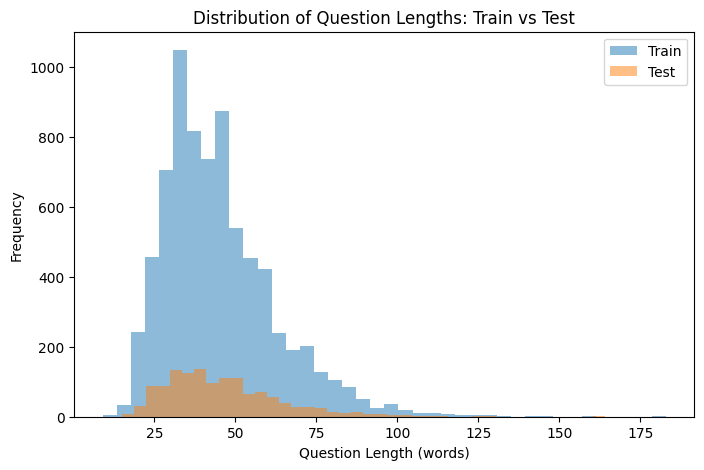

In [9]:
train_lens = ds["train"]["question"]
test_lens = ds["test"]["question"]

train_lengths = [len(q.split()) for q in train_lens]
test_lengths = [len(q.split()) for q in test_lens]

plt.figure(figsize=(8, 5))
plt.hist(train_lengths, bins=40, alpha=0.5, label="Train")
plt.hist(test_lengths, bins=40, alpha=0.5, label="Test")
plt.xlabel("Question Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Question Lengths: Train vs Test")
plt.legend()
plt.show()


# Sample answers 

In [ ]:
from strategic_ttc.models.hf_chat import HFChatModel

